In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)

2.4.0+cpu


In [3]:
!nvidia-smi

Fri Nov  8 15:48:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0             21W /   80W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#-- Scalar
scalar = torch.tensor(7)

print(scalar)
print(scalar.ndim)
print(scalar.shape)
print(scalar.item())

tensor(7)
0
torch.Size([])
7


In [5]:
#-- Vector
vector = torch.tensor([7, 7])

print(vector)
print(vector.ndim)
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In [6]:
#-- MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])

print(MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


In [7]:
# Tensor
TENSOR = torch.tensor([[[[1, 2, 3],
                         [3, 6, 9],
                         [2, 4, 5]]]])

print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)

tensor([[[[1, 2, 3],
          [3, 6, 9],
          [2, 4, 5]]]])
4
torch.Size([1, 1, 3, 3])


In [8]:
shape = (2,3,)

my_tensor = torch.rand(shape)

print(my_tensor.dtype)
print(my_tensor.shape)
print(my_tensor.device)

torch.float32
torch.Size([2, 3])
cpu


In [9]:
tensor = torch.ones(3,4)

print(tensor)
print(tensor[0])  # First Row
print(tensor[:,0])  # First Column
print(tensor[:,-1])  # Last Column
print(tensor[..., -1])  # Last Column
print(tensor[0,0])  # First Element

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1.])
tensor([1., 1., 1.])
tensor([1., 1., 1.])
tensor(1.)


In [10]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

print(tensor)
print(tensor.shape)

print(tensor.T)
print(tensor.T.shape)

print(y1)
print(y2)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([4, 3])
tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])
tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])


In [11]:
# This computes the element-wise product, z1 and z2 will have the same value
z1 = 4 * tensor
z2 = tensor.mul(4)

print(z1)
print(z2)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [12]:
# eye
torch.eye(6)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [13]:
# bernouli dist.
print(torch.bernoulli(torch.rand(3, 4)))

# multinomial dist.
print(torch.multinomial(torch.rand(3, 4), 2))

# normal dist.
print(torch.normal(mean=torch.arange(1., 11.), std=torch.arange(1, 0, -0.1)))

# possion dist.
print(torch.poisson(torch.rand(3, 4)))

# uniform dist.
print(torch.rand(3, 4))

tensor([[1., 1., 1., 0.],
        [1., 0., 1., 1.],
        [0., 0., 0., 1.]])
tensor([[3, 1],
        [3, 2],
        [0, 1]])
tensor([ 3.1077,  2.7244,  2.6502,  4.0951,  5.0040,  6.3820,  6.2702,  7.8835,
         9.0702, 10.1258])
tensor([[2., 0., 0., 0.],
        [1., 0., 0., 1.],
        [0., 0., 1., 1.]])
tensor([[0.3901, 0.2049, 0.7903, 0.6498],
        [0.7763, 0.0210, 0.0916, 0.7417],
        [0.6734, 0.5167, 0.1251, 0.7742]])


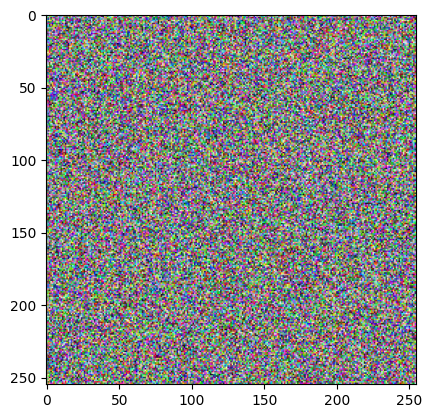

In [14]:
random_image = torch.rand(size=(255, 255, 3))

# Display the image
plt.imshow(random_image)

In [15]:
arange_tensor = torch.arange(0,11)
print(arange_tensor)
print(arange_tensor.ndim)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
1


In [16]:
zeros_tensor_like = torch.zeros_like(input=arange_tensor)
print(zeros_tensor_like)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [17]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,
                               device=None,
                               requires_grad=False)

float_16_tensor = float_32_tensor.type(torch.float16)


print(float_32_tensor.dtype)
print(float_16_tensor.dtype)

torch.float32
torch.float16


In [18]:
my_tensor = torch.ones((3,4),
                       dtype=torch.float16,
                       device=None,
                       requires_grad=False)

print(my_tensor)
print("Tensor Datatype:", my_tensor.dtype)
print("Tensor Shape:", my_tensor.shape)
print("Tensor Device:", my_tensor.device)
print("Tensor Requires Gradient:", my_tensor.requires_grad)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float16)
Tensor Datatype: torch.float16
Tensor Shape: torch.Size([3, 4])
Tensor Device: cpu
Tensor Requires Gradient: False


In [19]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

tensor1 @ tensor2  # Dot Product

tensor(32)

## Tensor Aggregation (e.g., min, max, sum, ..., etc.)

In [20]:
x = torch.arange(0, 100, 10)
print(x)
print(x.dtype)

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
torch.int64


In [21]:
# Find the minimum value
torch.min(x), x.min()

(tensor(0), tensor(0))

In [22]:
# Find the maximum value
torch.max(x), x.max()

(tensor(90), tensor(90))

In [23]:
# Find the sum of the elements
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [24]:
# Find the mean
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [25]:
torch.empty(3, 4)

tensor([[9.5223e-02, 1.9436e-42, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]])

In [26]:
# Finding the positional (i.e., index) min and max
# argmax() + max()  and  argmin() + min()

x = torch.rand(3,4)
print(x)
print(f"Index of Max Value: {x.argmax()} with Value: {x.max()}")
print(f"Index of Min Value: {x.argmin()} with value: {x.min()}")

tensor([[0.7938, 0.6944, 0.6101, 0.9752],
        [0.6919, 0.7925, 0.6461, 0.6886],
        [0.9402, 0.3234, 0.3594, 0.0852]])
Index of Max Value: 3 with Value: 0.9752017855644226
Index of Min Value: 11 with value: 0.08515942096710205


# Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - reshapes an inpus tensor to a defined shape
* View - returns a view of an input tensor of certain shape but keeps the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - returns a view of the input with dimensions permuted (swapped) in a certain way

In [27]:
x = torch.arange(1, 11)
x, x.shape, x.ndim

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]), 1)

In [28]:
# Add an extra dimension
x_reshaped = x.reshape(10,1)
x_reshaped, x_reshaped.shape, x_reshaped.ndim

(tensor([[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10]]),
 torch.Size([10, 1]),
 2)

In [29]:
# Change the view
z = x.view(1,10)
print(z)
print(z.shape)
print(z.ndim)

# Changing z changes x (both share the same memory)
z[:, 0] = 5
print(z)
print(x)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])
torch.Size([1, 10])
2
tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]])
tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [30]:
# Stacking tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)  # stack at index 0 in a row fashion
print(x)
print(x_stacked)

tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10])
tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]])


In [31]:
x_stacked = torch.stack([x, x, x, x], dim=1)  # stack at index 1 in a column fashion
print(x)
print(x_stacked)

tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10])
tensor([[ 5,  5,  5,  5],
        [ 2,  2,  2,  2],
        [ 3,  3,  3,  3],
        [ 4,  4,  4,  4],
        [ 5,  5,  5,  5],
        [ 6,  6,  6,  6],
        [ 7,  7,  7,  7],
        [ 8,  8,  8,  8],
        [ 9,  9,  9,  9],
        [10, 10, 10, 10]])


In [32]:
print(torch.vstack([x, x, x, x]))
print(torch.hstack([x, x, x, x]))

tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]])
tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10,  5,  2,  3,  4,  5,  6,  7,  8,
         9, 10,  5,  2,  3,  4,  5,  6,  7,  8,  9, 10,  5,  2,  3,  4,  5,  6,
         7,  8,  9, 10])


In [33]:
# Squeeze & Unsqueeze
x = torch.rand(2, 1, 5, 1)

print(f"Current Tensor: {x}")
print(f"Shape: {x.shape}")
print(f"Ndim: {x.ndim}")

x_squeezed = torch.squeeze(x)
print(f"\nSqueezed Tensor: {x_squeezed}")
print(f"Shape: {x_squeezed.shape}")
print(f"Ndim: {x_squeezed.ndim}")

x_unsqueezed = torch.unsqueeze(x_squeezed, dim=0)
print(f"\nUnsqueezed Tensor: {x_unsqueezed}")
print(f"Shape: {x_unsqueezed.shape}")

x_unsqueezed = torch.unsqueeze(x_squeezed, dim=1)
print(f"\nUnsqueezed Tensor: {x_unsqueezed}")
print(f"Shape: {x_unsqueezed.shape}")

Current Tensor: tensor([[[[0.0223],
          [0.7249],
          [0.7088],
          [0.4222],
          [0.3347]]],


        [[[0.2675],
          [0.0193],
          [0.1345],
          [0.5017],
          [0.3695]]]])
Shape: torch.Size([2, 1, 5, 1])
Ndim: 4

Squeezed Tensor: tensor([[0.0223, 0.7249, 0.7088, 0.4222, 0.3347],
        [0.2675, 0.0193, 0.1345, 0.5017, 0.3695]])
Shape: torch.Size([2, 5])
Ndim: 2

Unsqueezed Tensor: tensor([[[0.0223, 0.7249, 0.7088, 0.4222, 0.3347],
         [0.2675, 0.0193, 0.1345, 0.5017, 0.3695]]])
Shape: torch.Size([1, 2, 5])

Unsqueezed Tensor: tensor([[[0.0223, 0.7249, 0.7088, 0.4222, 0.3347]],

        [[0.2675, 0.0193, 0.1345, 0.5017, 0.3695]]])
Shape: torch.Size([2, 1, 5])


In [34]:
# permute
x = torch.rand(size=(255, 255, 3))  # Width, Height, Color Channels
print(x)
print(x.shape)

x_permuted = x.permute(2, 0, 1)
print(x_permuted)
print(x_permuted.shape)

# Chaning x_permuted changes x
x_permuted[0,0,0] = 100
print(x_permuted[0,0,0])
print(x[0,0,0])

tensor([[[2.6419e-01, 7.7166e-01, 9.9374e-01],
         [8.0376e-01, 8.4572e-01, 5.8602e-01],
         [4.4553e-01, 7.3284e-01, 6.5173e-01],
         ...,
         [1.1375e-01, 6.7546e-01, 5.5546e-01],
         [9.2932e-01, 8.1640e-01, 5.1750e-01],
         [9.7670e-01, 5.0514e-01, 1.2052e-01]],

        [[5.8434e-01, 9.2685e-05, 4.0752e-03],
         [2.0904e-01, 9.2638e-01, 3.7436e-02],
         [1.2979e-01, 5.7357e-01, 9.4018e-01],
         ...,
         [6.5880e-01, 6.2749e-01, 4.3847e-01],
         [1.1206e-01, 4.2092e-01, 1.0434e-01],
         [6.9270e-01, 9.8057e-01, 9.2006e-01]],

        [[9.2126e-01, 8.3072e-01, 1.6897e-01],
         [3.3280e-01, 9.0358e-01, 4.6229e-01],
         [9.7123e-01, 8.9359e-01, 7.7442e-01],
         ...,
         [7.5381e-01, 9.9233e-01, 7.3939e-01],
         [3.2252e-01, 6.9255e-01, 3.5937e-01],
         [5.9814e-01, 6.5089e-01, 8.9991e-01]],

        ...,

        [[9.6709e-01, 6.9151e-01, 6.3221e-01],
         [1.0512e-01, 4.4525e-01, 8.0188e-01]

In [35]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [36]:
x[0, :, 2]

tensor([3, 6, 9])

## PyTorch and NumPy

In [37]:
import numpy as np


# Tensor to Numpy Array
x = torch.ones(7)
print(x)
print(x.dtype, end="\n\n")

x_to_numpy = x.numpy()
print(x_to_numpy)
print(x_to_numpy.dtype)

tensor([1., 1., 1., 1., 1., 1., 1.])
torch.float32

[1. 1. 1. 1. 1. 1. 1.]
float32


In [38]:
# Numpy Array to Tensor
x_numpy = np.arange(1.0, 8.0)
print(x_numpy)
print(x_numpy.dtype, end="\n\n")

x_numpy_to_tensor = torch.from_numpy(x_numpy)
print(x_numpy_to_tensor)
print(x_numpy_to_tensor.dtype)

[1. 2. 3. 4. 5. 6. 7.]
float64

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)
torch.float64


## Reproducibility in PyTorch
* `torch.manual_seed()`

In [39]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_A = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Putting tensors (and models) on the GPU

In [40]:
!nvidia-smi

Fri Nov  8 15:48:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0             20W /   80W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [41]:
# Check for GPU access
torch.cuda.is_available()

False

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [43]:
# Count number of devices
torch.cuda.device_count()

0

In [44]:
my_tensor = torch.tensor([1, 2, 3])  # default is CPU

my_tensor, my_tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

In [45]:
# Move tensor to the GPU
my_tensor_on_gpu = my_tensor.to(device)
my_tensor_on_gpu

tensor([1, 2, 3])

In [46]:
# my_tensor_on_gpu.numpy()  # Error, NumPy only works on CPU
my_tensor_on_gpu.cpu().numpy()  # Move to CPU first

array([1, 2, 3], dtype=int64)